In [5]:
from pathlib import Path

data_dir = "../extraction_core/data/marmot_data"
data = [path for path in (list(Path(data_dir).glob("*.png")) + list(Path(data_dir).glob("*.bmp")))]

In [6]:
data[:5]

[PosixPath('../extraction_core/data/marmot_data/10.1.1.30.3567_5.bmp'),
 PosixPath('../extraction_core/data/marmot_data/10.1.1.160.659_3.bmp'),
 PosixPath('../extraction_core/data/marmot_data/10.1.1.6.2355_3.bmp'),
 PosixPath('../extraction_core/data/marmot_data/10.1.1.8.2176_75.bmp'),
 PosixPath('../extraction_core/data/marmot_data/10.1.1.160.652_9.bmp')]

In [9]:
import numpy as np
from PIL import Image

marmot_shapes = []
fp_shapes = []

for path in data:
    image = np.array(Image.open(path))
    if len(path.name) > 13:
        marmot_shapes.append(image.shape)
    else:
        fp_shapes.append(image.shape)

In [14]:
len(marmot_shapes)

509

In [15]:
len(fp_shapes)

110

In [11]:
marmot_heights = [shape[0] for shape in marmot_shapes]
marmot_width = [shape[1] for shape in marmot_shapes]

fp_heights = [shape[0] for shape in fp_shapes]
fp_widths = [shape[1] for shape in fp_shapes]

In [12]:
from matplotlib import pyplot as plt

(array([  1.,   0.,   0.,   6.,   3.,   2.,   7.,  21., 312., 157.]),
 array([ 651. ,  698.2,  745.4,  792.6,  839.8,  887. ,  934.2,  981.4,
        1028.6, 1075.8, 1123. ]),
 <BarContainer object of 10 artists>)

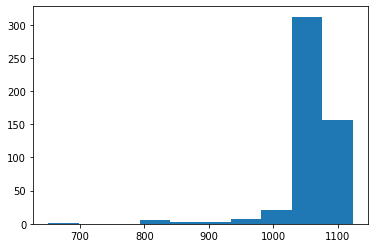

In [13]:
plt.hist(marmot_heights)

(array([  1.,   0.,  11.,   7.,  15., 469.,   0.,   0.,   1.,   5.]),
 array([ 528. ,  580.8,  633.6,  686.4,  739.2,  792. ,  844.8,  897.6,
         950.4, 1003.2, 1056. ]),
 <BarContainer object of 10 artists>)

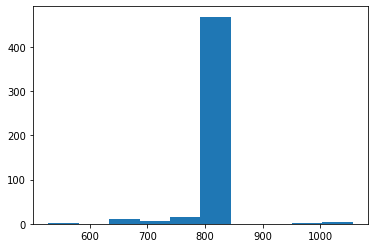

In [16]:
plt.hist(marmot_width)

(array([23.,  0.,  0.,  0.,  0.,  0.,  4., 81.,  0.,  2.]),
 array([2444. , 2582.8, 2721.6, 2860.4, 2999.2, 3138. , 3276.8, 3415.6,
        3554.4, 3693.2, 3832. ]),
 <BarContainer object of 10 artists>)

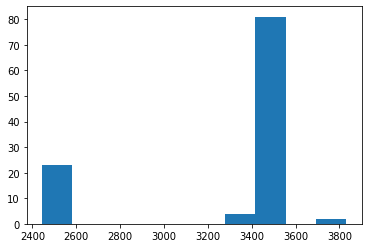

In [17]:
plt.hist(fp_heights)

(array([ 3., 88.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 19.]),
 array([2361. , 2475.9, 2590.8, 2705.7, 2820.6, 2935.5, 3050.4, 3165.3,
        3280.2, 3395.1, 3510. ]),
 <BarContainer object of 10 artists>)

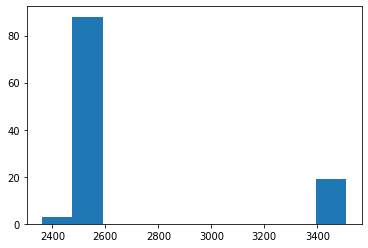

In [18]:
plt.hist(fp_widths)

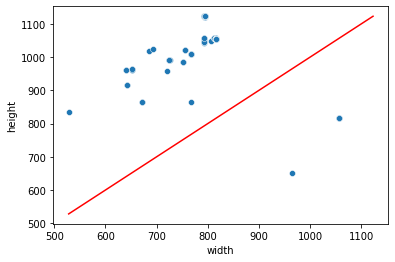

In [25]:
import seaborn as sns
import pandas as pd

marmot_df = pd.DataFrame({"height": marmot_heights, "width": marmot_width})
fp_df = pd.DataFrame({"height": fp_heights, "width": fp_widths})

xlims = (min(marmot_width), max(marmot_width))
ylims = (min(marmot_heights), max(marmot_heights))

lims = (min(xlims[0], ylims[0]), max(xlims[1], ylims[1]))

ax = sns.scatterplot(data=marmot_df, x="width", y="height")
ax.plot(lims, lims, color='r')
plt.show()

2 observations horizontales : retirer ?

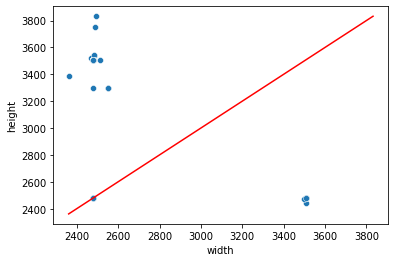

In [26]:
xlims = (min(fp_widths), max(fp_widths))
ylims = (min(fp_heights), max(fp_heights))

lims = (min(xlims[0], ylims[0]), max(xlims[1], ylims[1]))

ax = sns.scatterplot(data=fp_df, x="width", y="height")
ax.plot(lims, lims, color='r')
plt.show()

Plus d'observations à retirer ici

(array([  1.,   5.,   0.,   0.,   1.,   0., 308.,  26., 165.,   3.]),
 array([0.6753112 , 0.76592402, 0.85653684, 0.94714966, 1.03776248,
        1.1283753 , 1.21898812, 1.30960094, 1.40021376, 1.49082657,
        1.58143939]),
 <BarContainer object of 10 artists>)

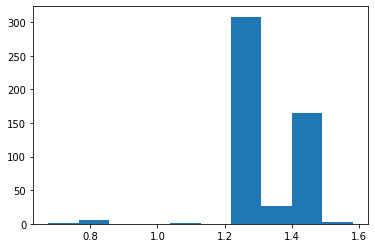

In [27]:
marmot_df['ratio'] = marmot_df['height'] / marmot_df['width']
fp_df['ratio'] = fp_df['height'] / fp_df['width']

plt.hist(marmot_df['ratio'])

(array([19.,  0.,  0.,  4.,  0.,  0.,  0.,  3., 82.,  2.]),
 array([0.6962963 , 0.78025384, 0.86421139, 0.94816893, 1.03212648,
        1.11608402, 1.20004156, 1.28399911, 1.36795665, 1.4519142 ,
        1.53587174]),
 <BarContainer object of 10 artists>)

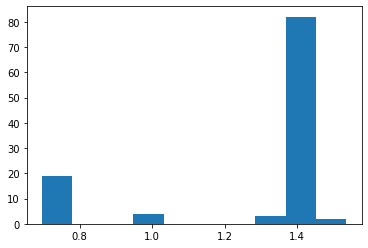

In [28]:
plt.hist(fp_df['ratio'])